In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("data/players.csv")
players

sessions <- read_csv("data/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [3]:
sessions <- sessions |>
    mutate(start_time = dmy_hm(start_time),
           end_time = dmy_hm(end_time))

sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12


In [4]:
sessions_playtime <- sessions |>
    mutate(play_time = as.numeric(difftime(end_time, start_time)))

sessions_playtime

hashedEmail,start_time,end_time,original_start_time,original_end_time,play_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,122
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12,9
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12,17
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12,18


In [5]:
player_playtime <- sessions_playtime |>
    group_by(hashedEmail) |>
    summarize(total_minutes = sum(play_time, na.rm = TRUE)) |>
    arrange(desc(total_minutes))


top20_player_ids <- player_playtime |>
    slice(1:20) |>
    pull(hashedEmail)

top20_players <- players |>
    filter(hashedEmail %in% top20_player_ids)

top20_players

player_avg_age <- players |>
    summarise(mean_age = round(mean(Age, na.rm = TRUE), 2))

player_avg_played_hours <- players |>
    summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2))
player_avg_age
player_avg_played_hours 

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17
Regular,TRUE,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,5.6,Winslow,Male,17
Veteran,TRUE,b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58,12.5,Isidore,Agender,27
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Amateur,TRUE,8e0aac3020b3fd9cdef4840b533b4b105aaf1ce1f6f2df3f328ba2a44cecfdc1,2.9,Rafael,Male,11
Regular,TRUE,f2826fb8dbce4d450348f99cb27ade184b713998d9679780442efaaf218038f2,3.6,Zane,Male,10
Amateur,TRUE,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,17.2,Kyrie,Male,14


mean_age
<dbl>
21.14


mean_played_hours
<dbl>
5.85


To answer question 2, I extract the top 20 players with the highest total play time and analyze their characteristics, such as experience level, age, and gender. By visualizing these patterns, I am trying to check whether certain types of players are more likely to become heavy contributors and produce large amounts of gameplay data.

**Data Description**

For this project, I am using two datasets collected from a Minecraft research server. Since my project focuses on identifying which kinds of players contribute the most gameplay data, the sessions dataset plays a central role. A single player may appear many times in session data, so I computed the total play time for each player by adding the duration of all their sessions. After creating this aggregated measure, I identified the top 20 players with the highest total play time. These players are used to check whether characteristics such as experience, age, or gender are associated with being a heavy contributor.

Below are the key variables I use from each dataset

**Number of Observations:**
* **players.csv:** 68 obsevations
* **sessions.csv:** 1535 obsevations

**Number of Variables:**
* **players.csv:** 7 variables
* **sessions.csv:** 6 variables

**Summary Statistics (Mean, 2 decimals)**
* **Age:** 21.14
* **played_hours:** 5.85

**From sessions.csv**
* hashedEmail (Character): Player identifier
* start_time (Datetime): when the session started (DD/MM/YYYY HH: MM) format
* end_time (Datetime): when the session ended (DD/MM/YYYY HH: MM) format
* play_time (Numeric): Length of the session in minutes

**From players.csv**
* experience (Character): Player identifier
* gender (Character): Gender
* Age (Numeric): Age in years
* played_hours (Numeric): Self-reported total hours played

**Data Collection**

* Session timestamps were automatically recorded by the Minecraft server
* Player demographics were collected through an optional player survey.


**Potential Issues:**

* Some sessions are extremely long, which may indicate players are not playing the game(AFK)
* Several variables in the players dataset, like played_hours, experience level, are self-reported and may not be fully accurate
* The overall sample size is small (68 players)

**Questions**

**Broad Question:** 
* What characteristics of players are associated with contributing a large amount of gameplay data? 

To explore this, I follow with a specific research question:
* Do player characteristics, such as experience level, age, and gender, help explain which players accumulate the highest total play time on the Minecraft research server?

For this question, 
**Response variable:**
* Total play time per player (minutes), calculated by adding all individual gameplay sessions.

**Explanatory variables:**
* Experience level (categorical)
* Age(numeric)
* Gender (categorical)

To address this question, I first aggregated the session data by player to compute each player's total number of minutes played. Then, I identified the top 20 players with the largest total play time and extracted their information from the players.csv file. These datasets allow me to investigate whether certain groups are more likely to be the heavy contributors.

**Exploratory Data Analysis and Visualization:**

* Before performing any modelling, I conducted exploratory data analysis to better understand the dataset and identify potential patterns related to my research question. I finished the minimum necessary wrangling, which converts timestamps to a datetime format to calculate total play time in minutes.

**Summary Statistics (players.csv)**

I computed basic summary statistics for the quantitative variables in the players dataset
* **Age:** 21.14 (mean)
* **played_hours:** 5.85 (mean)

These summary values help give an overview of the distribution of the players.

I created 4 visualizations to better understand the characteristics of the top 20 heavy contributors.

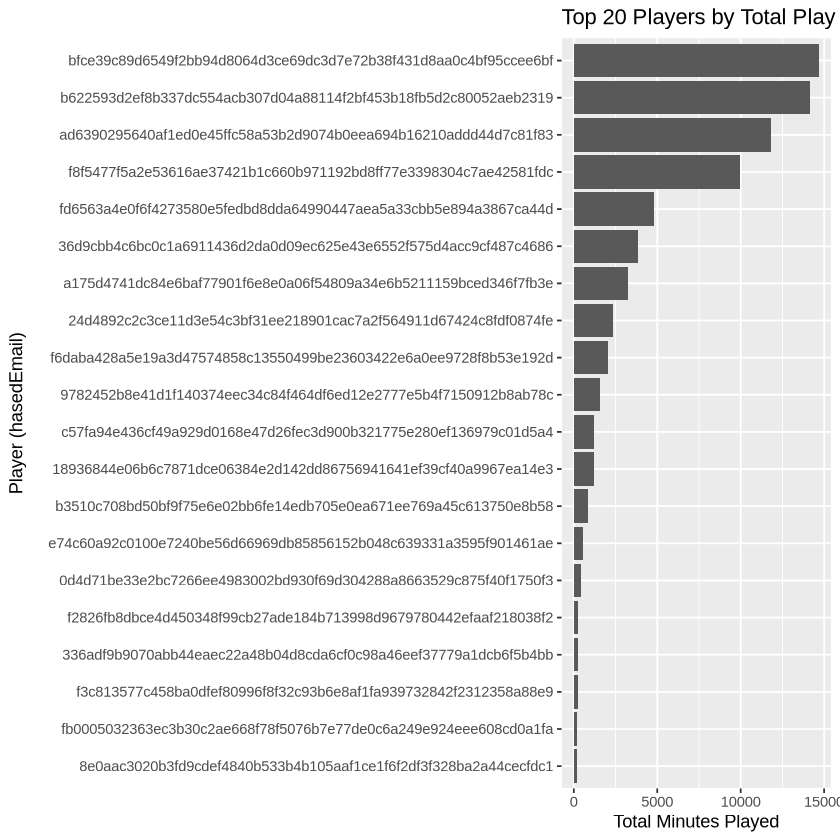

In [6]:

top_20_session_playtime <- player_playtime |>
    slice(1:20)
top_20_player_total_playtime <- top_20_session_playtime |>
    ggplot(aes(x = total_minutes, y = reorder(hashedEmail, total_minutes))) +
    geom_bar(stat = "identity") +
    labs(title = "Top 20 Players by Total Play Time", 
        x = "Total Minutes Played",
        y = "Player (hasedEmail)")
top_20_player_total_playtime

This bar graph plot shows the 20 players with the highest total minutes played.
It indicates that the top 4 players contribute most of the amount of gameplay data

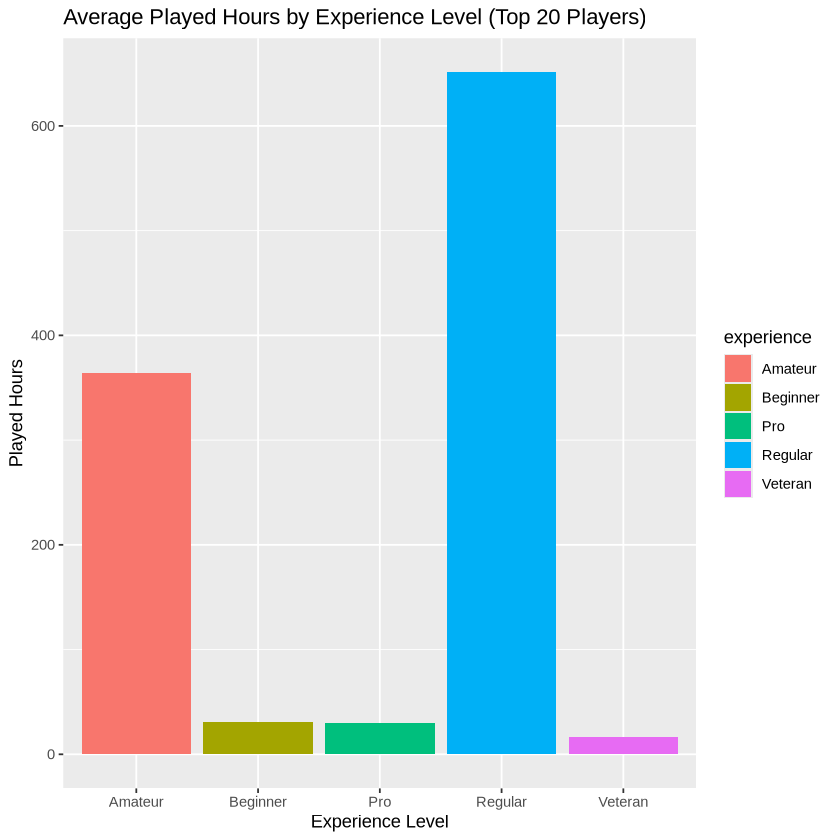

In [7]:

experience_vs_played_hours <- top20_players |>
    ggplot(aes(x = experience, y = played_hours, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(title = "Average Played Hours by Experience Level (Top 20 Players)", 
        x = "Experience Level",
        y = "Played Hours")
experience_vs_played_hours

This bar graph plot compares the played hours across different experience levels. Regular players clearly contribute the most play time compared to Pro, Beginner, and Veteran playerss. This suggests that Regular and Amateur players are the main contributors of gameplay data.

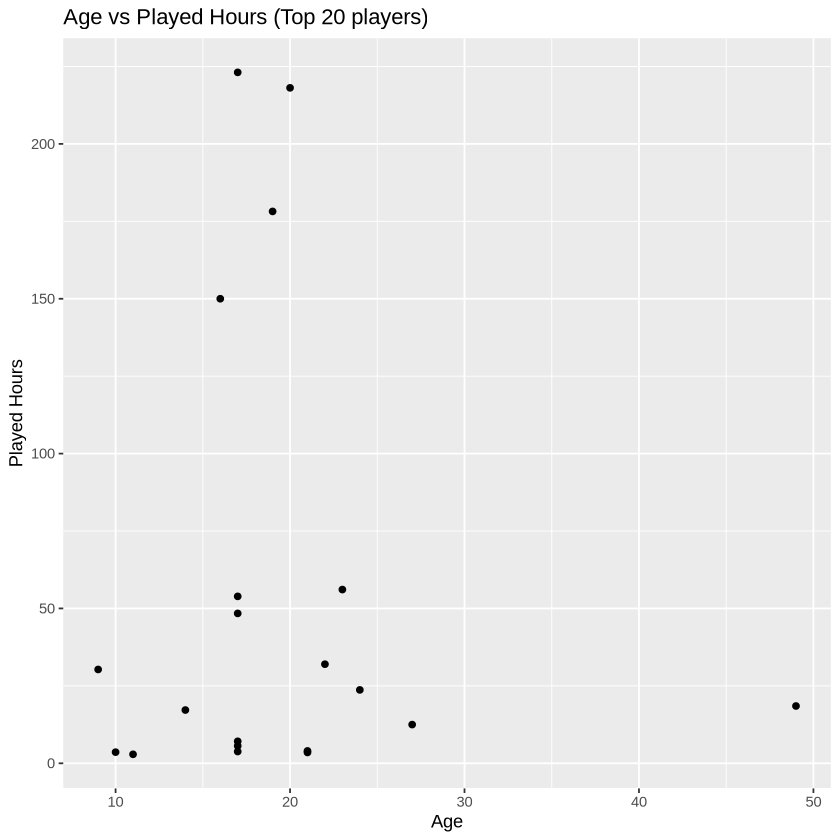

In [8]:
age_vs_played_hours <- top20_players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(title = "Age vs Played Hours (Top 20 players)", 
        x = "Age",
        y = "Played Hours")
age_vs_played_hours

This scatter plot compares age and played hours for the top 20 players. The highest playtime mostly comes from the age group between 15 and 20. However, older players tend to show lower total hours. This indicates that younger age groups are more active contributors.

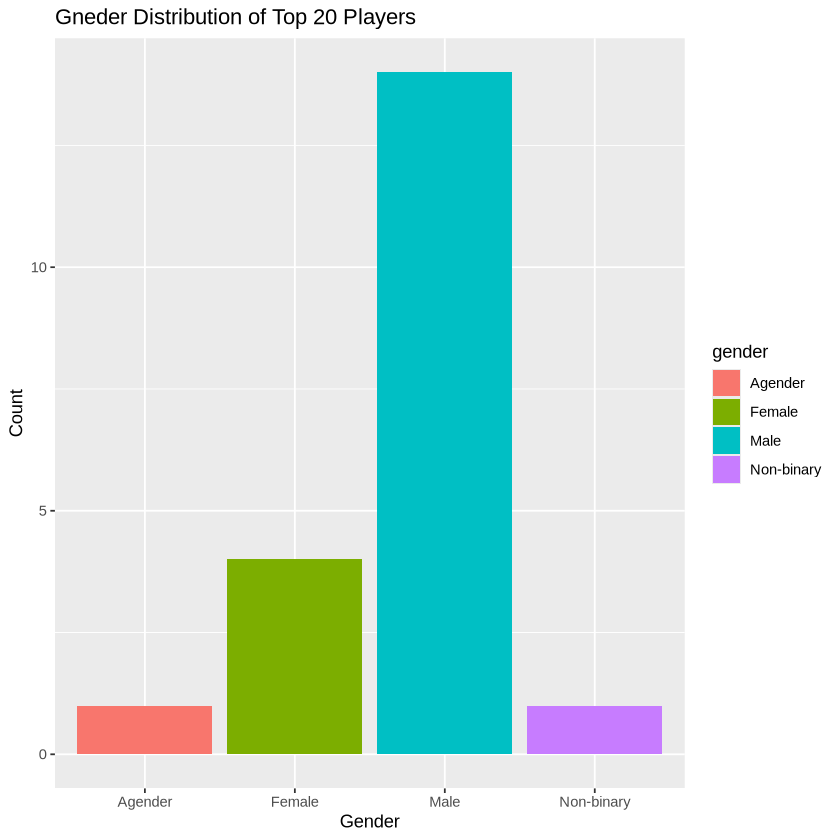

In [9]:
gender_vs_played_hours <- top20_players |>
    ggplot(aes(x = gender, fill = gender)) +
    geom_bar() +
    labs(title = "Gneder Distribution of Top 20 Players", 
        x = "Gender",
        y = "Count")
gender_vs_played_hours

This bar graph shows that most of the top 20 high-playtime players are male, with fewer female, agender, and non-binary players. This indicates that male players contribute the largest share of gameplay in this dataset.

**Methods and Plan**

To address my research question, whether player characteristics such as age, gender, and experience level can help explain which players contribute the most gameplay time, I chose the plan to see how different factors together relate to one number, which is total play time. This method is appropriate because it helps to see which of these factors matter the most and how they affect the total play time when considered together.

**Assumptions:**
* Each player's data should be separate and independent
* The predictors should not be too similar to each other

**Limitations and Weaknesses**
* The dataset is small since I focus only on the top 20 players. A small dataset can make the model less reliable
* Some information, such as experience level or self-reported hours, might not be perfectly accurate.

To understand which player characteristics relate to total play time, I will clean the data by adding up each player's session times and merging that with their information, ensuring that categories like gender and experience level are stored correctly. I will split the data into an 80% training set and a 20% test set so I can build the model on one part and fairly evaluate it on the other. Since the dataset is small, I will use 5-fold cross-validation to reduce overfitting and get a more reliable estimate of how well the model works.